### Import Necessary Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, plot_confusion_matrix, plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
import eli5
from eli5.sklearn import PermutationImportance
import statsmodels.api as sm
import time
import warnings
warnings.filterwarnings("ignore")

### Read the datasets

In [ ]:
train = pd.read_csv("/train.csv")
test = pd.read_csv("/test.csv")

### Train Dataset

In [ ]:
# Get Number of records and columns
print(train.shape)
train.head(10)

(72780, 25)


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172.0,Male,Loyal Customer,13.0,Personal Travel,Eco Plus,460.0,3.0,4.0,...,5.0,4.0,3.0,4.0,4.0,5.0,5.0,25.0,18.0,neutral or dissatisfied
1,1,5047.0,Male,disloyal Customer,25.0,Business travel,Business,235.0,3.0,2.0,...,1.0,1.0,5.0,3.0,1.0,4.0,1.0,1.0,6.0,neutral or dissatisfied
2,2,110028.0,Female,Loyal Customer,26.0,Business travel,Business,1142.0,2.0,2.0,...,5.0,4.0,3.0,4.0,4.0,4.0,5.0,0.0,0.0,satisfied
3,3,24026.0,Female,Loyal Customer,25.0,Business travel,Business,562.0,2.0,5.0,...,2.0,2.0,5.0,3.0,1.0,4.0,2.0,11.0,9.0,neutral or dissatisfied
4,4,119299.0,Male,Loyal Customer,61.0,Business travel,Business,214.0,3.0,3.0,...,3.0,3.0,4.0,4.0,3.0,3.0,3.0,0.0,0.0,satisfied
5,5,111157.0,Female,Loyal Customer,26.0,Personal Travel,Eco,1180.0,3.0,4.0,...,1.0,3.0,4.0,4.0,4.0,4.0,1.0,0.0,0.0,neutral or dissatisfied
6,6,82113.0,Male,Loyal Customer,47.0,Personal Travel,Eco,1276.0,2.0,4.0,...,2.0,3.0,3.0,4.0,3.0,5.0,2.0,9.0,23.0,neutral or dissatisfied
7,7,96462.0,Female,Loyal Customer,52.0,Business travel,Business,2035.0,4.0,3.0,...,5.0,5.0,5.0,5.0,4.0,5.0,4.0,4.0,0.0,satisfied
8,8,79485.0,Female,Loyal Customer,41.0,Business travel,Business,853.0,1.0,2.0,...,1.0,1.0,2.0,1.0,4.0,1.0,2.0,0.0,0.0,neutral or dissatisfied
9,9,65725.0,Male,disloyal Customer,20.0,Business travel,Eco,1061.0,3.0,3.0,...,2.0,2.0,3.0,4.0,4.0,3.0,2.0,0.0,0.0,neutral or dissatisfied


In [ ]:
# Drop unnecessary columns
train = train.drop('Unnamed: 0', axis=1)
train = train.drop('id', axis=1)
# Check size of the data set
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45536 entries, 0 to 45535
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             45536 non-null  object 
 1   Customer Type                      45536 non-null  object 
 2   Age                                45536 non-null  int64  
 3   Type of Travel                     45536 non-null  object 
 4   Class                              45536 non-null  object 
 5   Flight Distance                    45536 non-null  int64  
 6   Inflight wifi service              45536 non-null  int64  
 7   Departure/Arrival time convenient  45536 non-null  int64  
 8   Ease of Online booking             45536 non-null  int64  
 9   Gate location                      45536 non-null  int64  
 10  Food and drink                     45536 non-null  int64  
 11  Online boarding                    45536 non-null  int

### Test Dataset

In [ ]:
# Get Number of records and columns
print(test.shape)
test.head(10)

(25976, 25)


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
5,5,39177,Male,Loyal Customer,16,Business travel,Eco,311,3,3,...,5,4,3,1,1,2,5,0,0.0,satisfied
6,6,79433,Female,Loyal Customer,77,Business travel,Business,3987,5,5,...,5,5,5,5,4,5,3,0,0.0,satisfied
7,7,97286,Female,Loyal Customer,43,Business travel,Business,2556,2,2,...,4,4,4,4,5,4,3,77,65.0,satisfied
8,8,27508,Male,Loyal Customer,47,Business travel,Eco,556,5,2,...,5,2,2,5,3,3,5,1,0.0,satisfied
9,9,62482,Female,Loyal Customer,46,Business travel,Business,1744,2,2,...,4,4,4,4,5,4,4,28,14.0,satisfied


In [ ]:
# Drop unnecessary columns
test = test.drop('Unnamed: 0', axis=1)
test = test.drop('id', axis=1)
# Check size of the data set
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25976 non-null  object 
 1   Customer Type                      25976 non-null  object 
 2   Age                                25976 non-null  int64  
 3   Type of Travel                     25976 non-null  object 
 4   Class                              25976 non-null  object 
 5   Flight Distance                    25976 non-null  int64  
 6   Inflight wifi service              25976 non-null  int64  
 7   Departure/Arrival time convenient  25976 non-null  int64  
 8   Ease of Online booking             25976 non-null  int64  
 9   Gate location                      25976 non-null  int64  
 10  Food and drink                     25976 non-null  int64  
 11  Online boarding                    25976 non-null  int

### Replace spaces in the column names with underscore - Train and Test

In [ ]:
train.columns = [c.replace(' ', '_') for c in train.columns]
test.columns = [c.replace(' ', '_') for c in test.columns]

### Replacing label column "satisfaction" values with 0 and 1 *(neutral or dissatisfied = 0 and satisfied = 1)* - Train and Test

In [ ]:
train['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)
test['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)

### Check for the nature of dataset - balanced or imbalanced

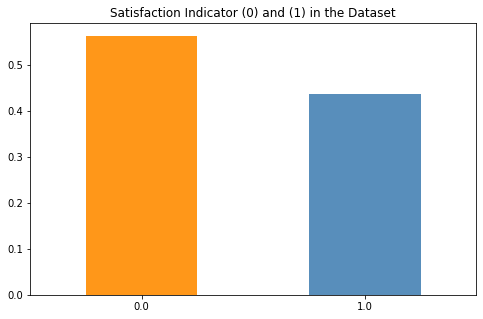

In [ ]:
fig = plt.figure(figsize = (8,5))
train.satisfaction.value_counts(normalize = True).plot(kind='bar', color= ['darkorange','steelblue'], alpha = 0.9, rot=0)
plt.title('Satisfaction Indicator (0) and (1) in the Dataset')
plt.show()

The above plot shows a distribution of around 55:45 between neutral/dissatisfied passengers and satisfied passengers respectively.
So the data is quite balanced and it does not require any special resampling methods to be implemented.

### Handling the missing data

In [ ]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head()

,Total,Percent
Arrival_Delay_in_Minutes,141,0.003096
satisfaction,1,0.000022
Departure_Delay_in_Minutes,1,0.000022
Cleanliness,1,0.000022
Inflight_service,1,0.000022


In [ ]:
# Imputing missing value with mean - Train and Test
train['Arrival_Delay_in_Minutes'] = train['Arrival_Delay_in_Minutes'].fillna(train['Arrival_Delay_in_Minutes'].mean())
test['Arrival_Delay_in_Minutes'] = test['Arrival_Delay_in_Minutes'].fillna(test['Arrival_Delay_in_Minutes'].mean())

In [ ]:
# Check the list of categorical variables
train.select_dtypes(include=['object']).columns

Index(['Gender', 'Customer_Type', 'Type_of_Travel', 'Class'], dtype='object')

In [ ]:
# Replace NaN with mode for categorical variables - Train and Test

train['Gender'] = train['Gender'].fillna(train['Gender'].mode()[0])
train['Customer_Type'] = train['Customer_Type'].fillna(train['Customer_Type'].mode()[0])
train['Type_of_Travel'] = train['Type_of_Travel'].fillna(train['Type_of_Travel'].mode()[0])
train['Class'] = train['Class'].fillna(train['Class'].mode()[0])

test['Gender'] = test['Gender'].fillna(test['Gender'].mode()[0])
test['Customer_Type'] = test['Customer_Type'].fillna(test['Customer_Type'].mode()[0])
test['Type_of_Travel'] = test['Type_of_Travel'].fillna(test['Type_of_Travel'].mode()[0])
test['Class'] = test['Class'].fillna(test['Class'].mode()[0])

### Exploratory Data Analysis

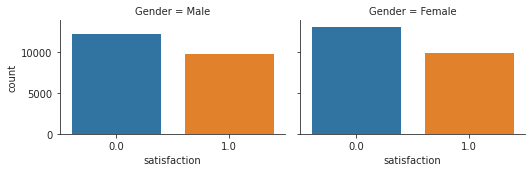

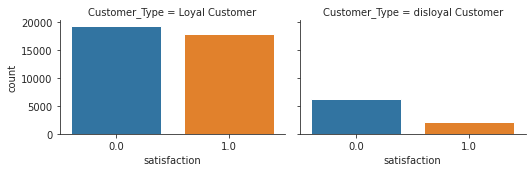

In [ ]:
# Gender and Customer type
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Gender", col_wrap=2, data=train, kind="count", height=2.5, aspect=1.5)
    g = sns.catplot("satisfaction", col="Customer_Type", col_wrap=2, data=train, kind="count", height=2.5, aspect=1.5)

**Gender:** <br/>
It is observed that gender distribution of neutral/dissatisfied and satisfied customers are similar. For both male and female passengers, number of neutral/dissatisfied customers are on the higher when compared to number of satisfied customers.

**Customer Type:** <br/>
Even among loyal passengers which are high in number, the ratio of satisfied and neutral/dissatisfied ones are almost close to 49:51.

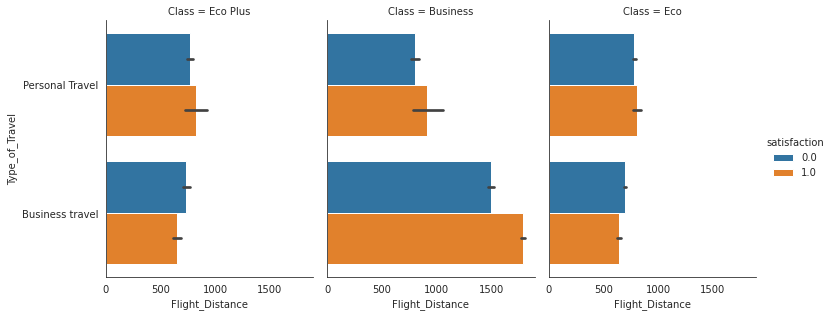

In [ ]:
# Type_of_Travel and Flight_Distance by Class
with sns.axes_style('white'):
    g = sns.catplot(x="Flight_Distance", y="Type_of_Travel", hue="satisfaction", col="Class", data=train, kind="bar", height=4.5, aspect=.8)

**Type of Travel and Flight Distance grouped by Class:** <br/>
For business travel in business class category, the number of satisfied passengers are quite on the higher for longer flight distance. For other combinations, almost equal distribution of satisfied and neutral/dissatisfied passengers is present.

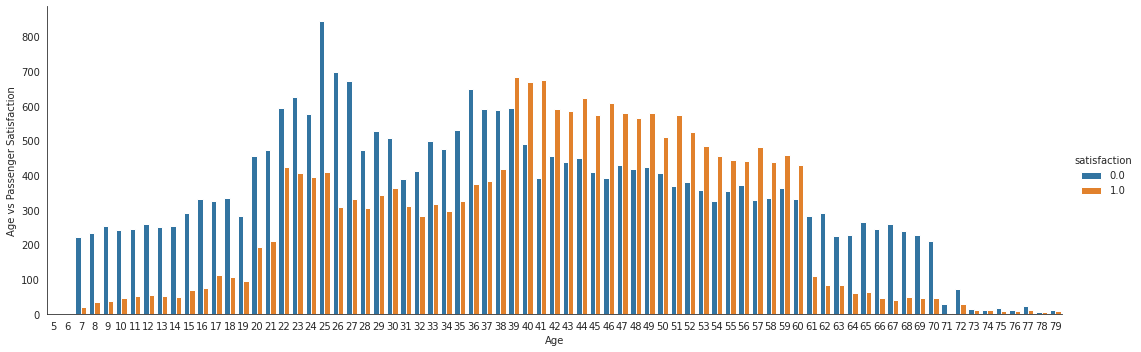

In [ ]:
# Age
with sns.axes_style('white'):
    g = sns.catplot("Age", data=train, aspect=3.0, kind='count', hue='satisfaction', order=range(5, 80))
    g.set_ylabels('Age vs Passenger Satisfaction')

**Age:** <br/>
From age 7-to-38 and from age 61-to-79, the number of neutral/dissatisfied passengers is very high compared to satisfied passengers. On the other hand, in age group 39-60, the number of satisfied passengers is higher compared to neutral/dissatisfied passengers.

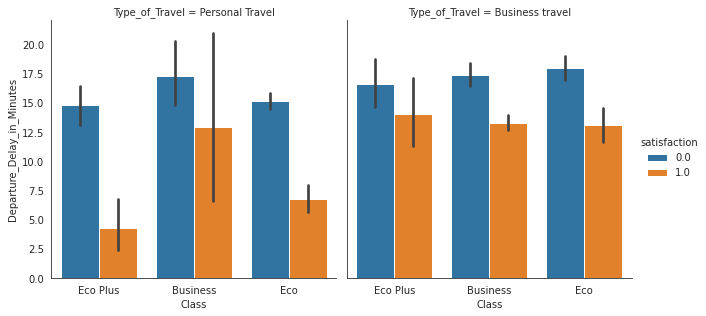

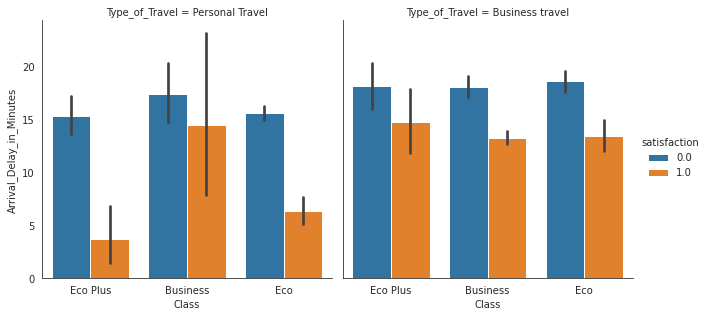

In [ ]:
# Departure_Delay and Arrival Delay by Type_of_Travel
with sns.axes_style('white'):
    g = sns.catplot(x="Class", y="Departure_Delay_in_Minutes", hue="satisfaction", col="Type_of_Travel", data=train, kind="bar", height=4.5, aspect=1.0)
    g = sns.catplot(x="Class", y="Arrival_Delay_in_Minutes", hue="satisfaction", col="Type_of_Travel", data=train, kind="bar", height=4.5, aspect=1.0)

**Departure Delay, Arrival Delay grouped by Type of Travel:** <br/>
For personal type of travel (specially for classes Eco Plus and Eco), the number of neutral/dissatisfied passengers are really high when arrival delay is high which is quite obvious. By minute comparison, all combinations have higher number of neutral/dissatisfied passengers compared to the number of satisfied passengers.

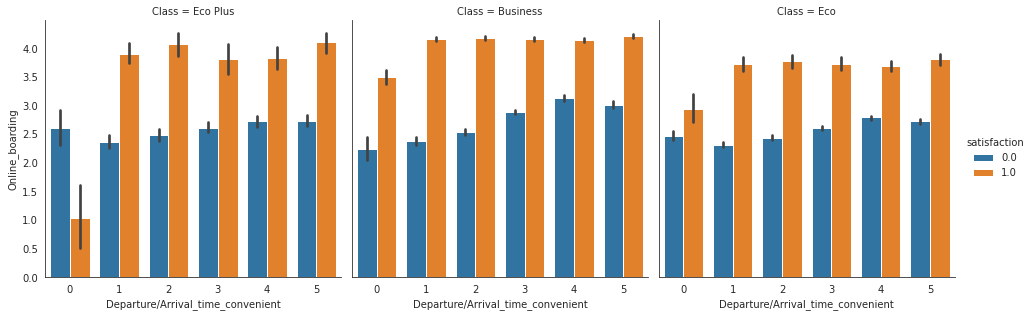

In [ ]:
# Online_boarding and Departure/Arrival_time_convenient by class
with sns.axes_style('white'):
    g = sns.catplot(x="Departure/Arrival_time_convenient", y="Online_boarding", hue="satisfaction", col="Class", data=train, kind="bar", height=4.5, aspect=1.0)

**Online Boarding, Departure/Arrival Time Convenience grouped by Class:** <br/>
For Eco Plus class, very inconvenient Departure/Arrival time i.e., Departure/Arrival_time_convenient = 0 has high number of neutral/dissatisfied passengers, even when online boarding is on positive side. For other combinations, the number of satisfied passengers are higher compared to number of neutral/dissatisfied passengers.

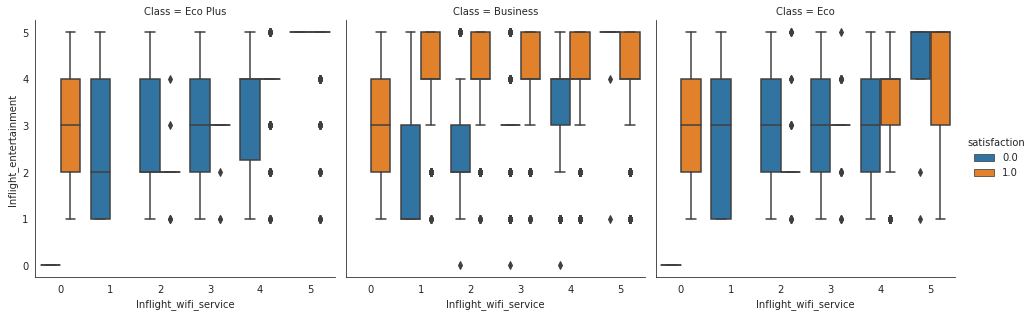

In [ ]:
# Inflight_wifi_service and Inflight_entertainment by Class
with sns.axes_style('white'):
    g = sns.catplot(x="Inflight_wifi_service", y="Inflight_entertainment", hue="satisfaction", col="Class", data=train, kind="box", height=4.5, aspect=1.0)

**Inflight Entertainment, Inflight wi-fi Service grouped by Class:** <br/>
Eco Plus passengers are mostly satisfied without inflight wi-fi service (rating 0) and with moderate level of in-flight entertainment (rating 2 - 4). For Business class passengers, only highest level of in-flight entertainment (rating 5) can bring satisfaction in them. For Eco passengers, high level of in-flight entertainment (rating 3 - 5) and very high wi-fi service availability (rating 5) can make them satisfied.

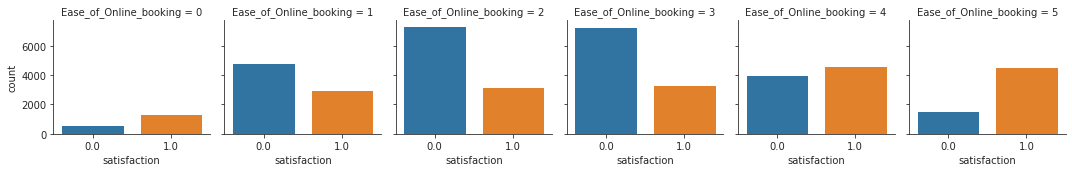

In [ ]:
# Ease_of_Online_booking
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Ease_of_Online_booking", col_wrap=6, data=train, kind="count", height=2.5, aspect=1.0)

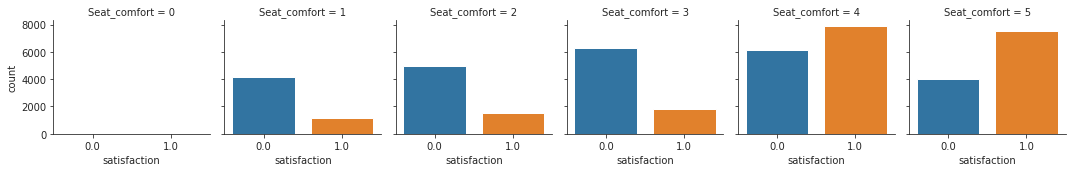

In [ ]:
# Seat_comfort
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Seat_comfort", col_wrap=6, data=train, kind="count", height=2.5, aspect=1.0)

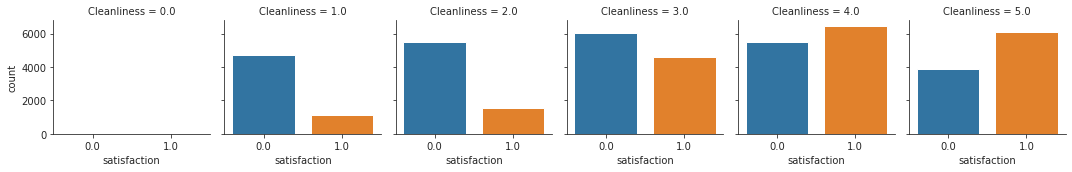

In [ ]:
# Cleanliness
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Cleanliness", col_wrap=6, data=train, kind="count", height=2.5, aspect=1.0)

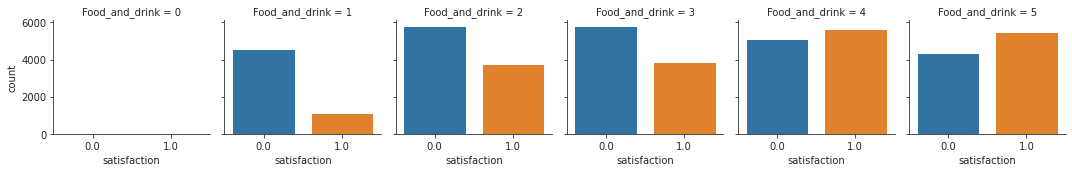

In [ ]:
# Food_and_drink
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Food_and_drink", col_wrap=6, data=train, kind="count", height=2.5, aspect=1.0)

**Ease of Online Booking, Seat Comfort, Cleanliness & Food and Drink:** <br/>
For all of these four features, maximum number of satisfied passengers belongs to the category who gave 4 and 5 rating. The passengers who gave rating below 4 are mostly neutral/dissatisfied.

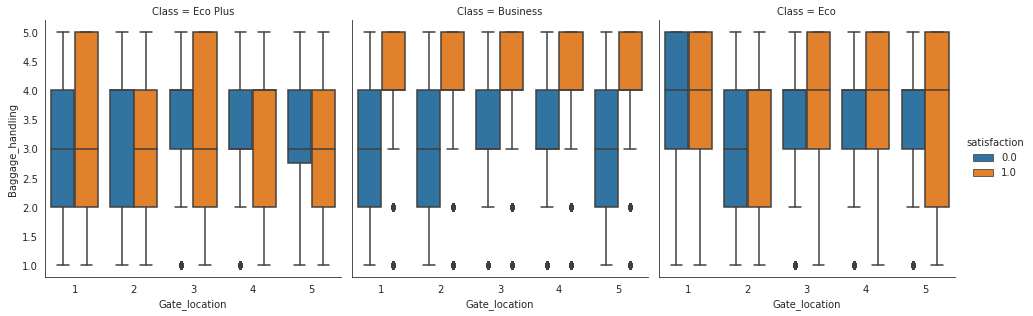

In [ ]:
# Gate_location and Baggage_handling by Class
with sns.axes_style('white'):
    g = sns.catplot(x="Gate_location", y="Baggage_handling", hue="satisfaction", col="Class", data=train, kind="box", height=4.5, aspect=1.0)

**Gate Location and Baggage Handling grouped by Class:** <br/>
For business class passengers, it is observed that all gate locations have higher number of neutral/dissatisfied passengers when baggage handling is not upto the satisfactory level (rating <= 4). For Eco Plus class, when the gate location is 1 and for Eco class, when the gate location is 2, even when the baggages are handled in a mediocre way (rating 2 to 4), passengers remained neutral/dissatisfied.

<AxesSubplot:xlabel='Inflight_service', ylabel='satisfaction'>

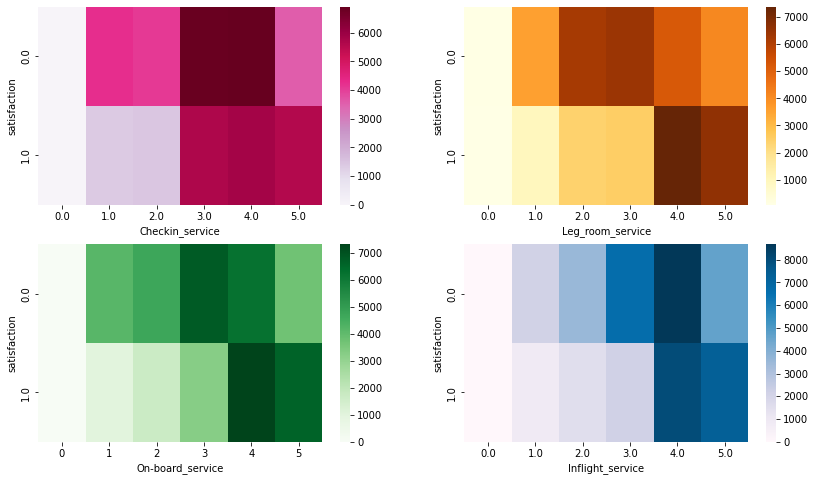

In [ ]:
# Checkin_service, Leg_room_service, On-board_service and Inflight_service

fig, axarr = plt.subplots(2, 2, figsize=(14, 8))

table1 = pd.crosstab(train['satisfaction'], train['Checkin_service'])
sns.heatmap(table1, cmap='PuRd', ax = axarr[0][0])
table2 = pd.crosstab(train['satisfaction'], train['Leg_room_service'])
sns.heatmap(table2, cmap='YlOrBr', ax = axarr[0][1])
table3 = pd.crosstab(train['satisfaction'], train['On-board_service'])
sns.heatmap(table3, cmap='Greens', ax = axarr[1][0])
table4 = pd.crosstab(train['satisfaction'], train['Inflight_service'])
sns.heatmap(table4, cmap='PuBu', ax = axarr[1][1])

**Checkin Service, Leg-room Service, On-board Service and Inflight Service:** <br/>
For checkin services, the passengers who gave 0-2 rating are majorly neutral/dissatisfied. For other three services mentioned above, only the customers or passengers who give 4 and 5 rating belong to satisfied passengers category.

### Label Encoding of Categorical Variables

In [ ]:
# For Train set
lencoders = {}
for col in train.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    train[col] = lencoders[col].fit_transform(train[col])

In [ ]:
# For Test Set
lencoders_t = {}
for col in test.select_dtypes(include=['object']).columns:
    lencoders_t[col] = LabelEncoder()
    test[col] = lencoders_t[col].fit_transform(test[col])

### Detection and Removal of Outliers

In [ ]:
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Unnamed: 0                           36389.5
id                                   64795.5
Gender                                   1.0
Customer Type                            0.0
Age                                     24.0
Type of Travel                           1.0
Class                                    1.0
Flight Distance                       1326.0
Inflight wifi service                    2.0
Departure/Arrival time convenient        2.0
Ease of Online booking                   2.0
Gate location                            2.0
Food and drink                           2.0
Online boarding                          2.0
Seat comfort                             3.0
Inflight entertainment                   2.0
On-board service                         2.0
Leg room service                         2.0
Baggage handling                         2.0
Checkin service                          1.0
Inflight service                         2.0
Cleanliness                              2.0
Departure 

In [ ]:
# Removal of outliers from dataset
train = train[~((train < (Q1 - 1.5 * IQR)) |(train > (Q3 + 1.5 * IQR))).any(axis=1)]
train.shape

(42849, 25)

### Finding Correlation among Features

Correlation Heatmap

<AxesSubplot:>

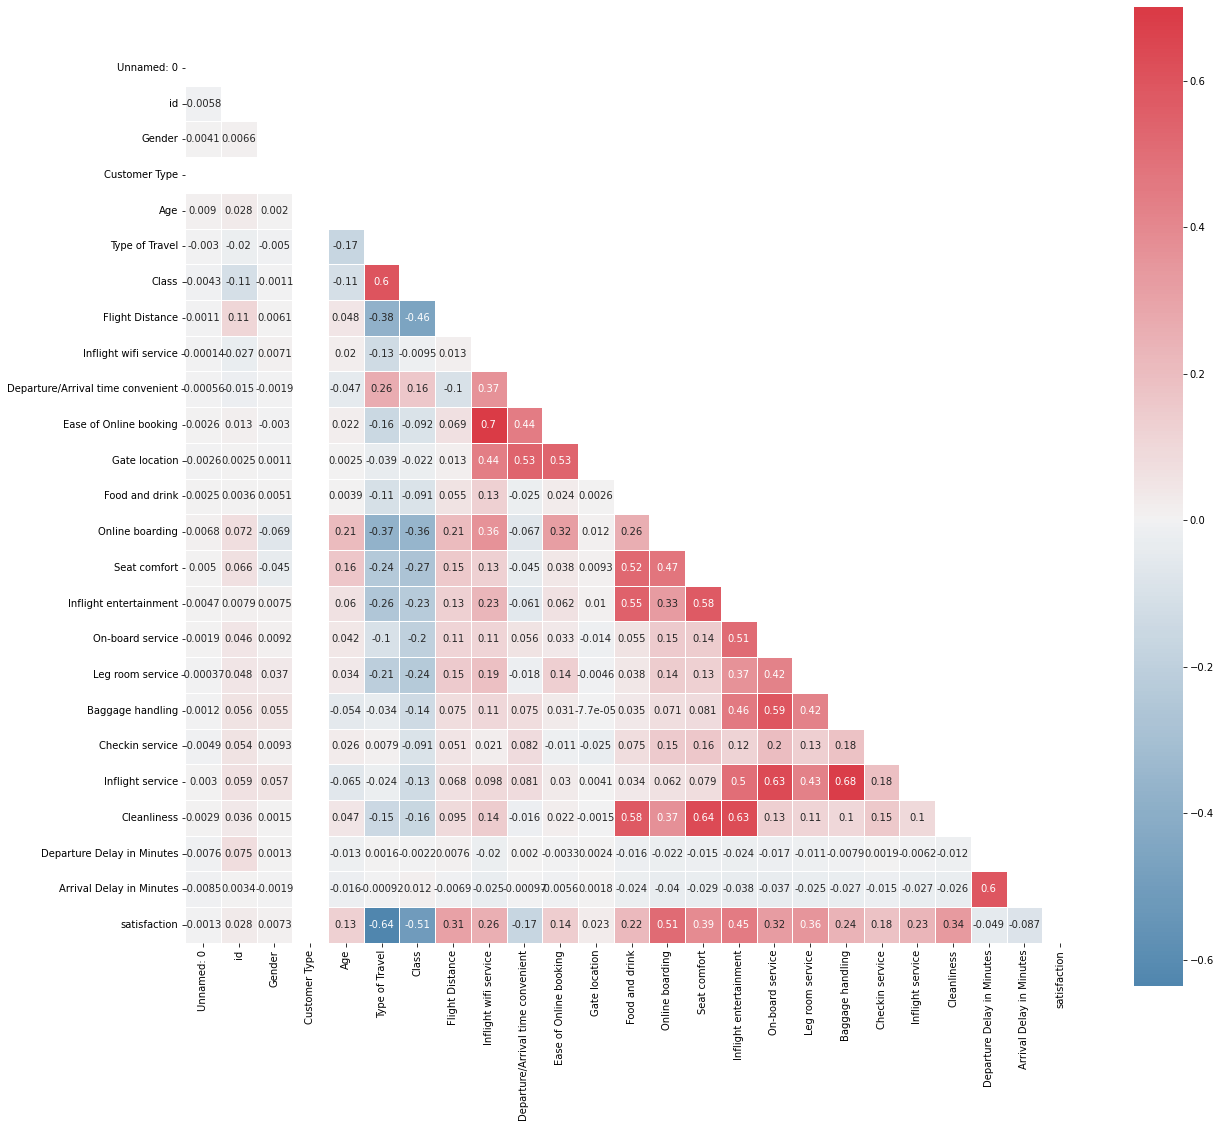

In [ ]:
corr = train.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

"Ease_of_Online_booking" is highly correlated with "Inflight_wifi_service" and "Inflight_service" is highly correlated with "Baggage_handling". But no pair is having corrrelation coefficient exactly equal to 1. Therefore there is no perfect multi-collinearity. Hence we are not discarding any variable.

### Selection of top 10 features using Chi-Square

In [ ]:
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(train)
modified_data = pd.DataFrame(r_scaler.transform(train), columns=train.columns)
modified_data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0.000000,0.540273,1.0,0.0,0.076923,1.0,1.0,0.116040,0.6,0.8,...,1.0,0.8,0.6,0.75,0.666667,1.0,1.0,0.833333,0.56250,0.0
1,0.000027,0.847148,0.0,0.0,0.243590,0.0,0.0,0.300514,0.4,0.4,...,1.0,0.8,0.6,0.75,0.666667,0.8,1.0,0.000000,0.00000,1.0
2,0.000055,0.918531,1.0,0.0,0.692308,0.0,0.0,0.049500,0.6,0.6,...,0.6,0.6,0.8,0.75,0.333333,0.6,0.6,0.000000,0.00000,1.0
3,0.000069,0.855841,0.0,0.0,0.243590,1.0,0.5,0.310793,0.6,0.8,...,0.2,0.6,0.8,0.75,0.666667,0.8,0.2,0.000000,0.00000,0.0
4,0.000082,0.632214,1.0,0.0,0.512821,1.0,0.5,0.336760,0.4,0.8,...,0.4,0.6,0.6,0.75,0.333333,1.0,0.4,0.300000,0.71875,0.0


In [ ]:
modified_data.replace([np.inf, -np.inf], np.nan, inplace=True)
modified_data.fillna(modified_data.mean(), inplace=True)

In [ ]:
X = modified_data.loc[:,modified_data.columns!='satisfaction']
y = modified_data[['satisfaction']]
selector = SelectKBest(chi2, k=10)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Cleanliness'],
      dtype='object')


### Importance of feature using Wrapper Method

In [ ]:
train.replace([np.inf, -np.inf], np.nan, inplace=True)
train.fillna(train.mean(), inplace=True)

X = train.drop('satisfaction', axis=1)
y = train['satisfaction']
selector = SelectFromModel(rf(n_estimators=100, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(rf(n_estimators=100, random_state=0).fit(X,y).feature_importances_)

['Type of Travel', 'Class', 'Inflight wifi service', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'Leg room service']
[0.01528703 0.02580357 0.00423207 0.         0.02760285 0.17120818
 0.09150209 0.03446013 0.11171559 0.01968748 0.02956914 0.01271882
 0.01119244 0.15812231 0.05083802 0.05591344 0.02799957 0.04292533
 0.02481555 0.02034511 0.02105015 0.02912041 0.00627738 0.00761332]


**'Type_of_Travel', 'Class', 'Inflight_wifi_service', 'Online_boarding', 'Seat_comfort', 'Inflight_entertainment'** <br/>
Only these six features are inherently important in contributing towards the customer or passenger satisfaction. Another feature importance deciding method is also used to cross check the results obtained in this method.

### Feature Permutation Importance

From all the above results, we can conclude the list of important features that affects the customer or passenger satisfaction.

***Most Important Features:*** <br/>
Type_of_Travel, Inflight_wifi_service, Online_boarding, Seat_comfort

***Other Important Features:*** <br/>
Class, Flight_Distance, Inflight_entertainment, On-board_service, Leg_room_service, Cleanliness, Checkin_service, Inflight_service, Baggage_handlin

### Building Models

In [ ]:
test.replace([np.inf, -np.inf], np.nan, inplace=True)
test.fillna(test.mean(), inplace=True)

from sklearn.model_selection import train_test_split

features = ['Type_of_Travel','Inflight_wifi_service','Online_boarding','Seat_comfort','Flight_Distance',
            'Inflight_entertainment','On-board_service','Leg_room_service','Cleanliness','Checkin_service',
            'Inflight_service', 'Baggage_handling']
target = ['satisfaction']

# Split into test and train


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, train_size=0.75, random_state=101)

# Normalize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train.ravel(), verbose=0)
    else:
        model.fit(X_train,y_train.ravel())
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.pink, normalize = 'all')
    plot_roc_curve(model, X_test, y_test)

    return model, accuracy, roc_auc, time_taken

#### Logistic Regression

Accuracy = 0.8896667600112014
ROC Area under Curve = 0.8899368438568465
Time taken = 0.22835087776184082
              precision    recall  f1-score   support

           0    0.87595   0.90204   0.88881      5237
           1    0.90357   0.87783   0.89052      5476

    accuracy                        0.88967     10713
   macro avg    0.88976   0.88994   0.88966     10713
weighted avg    0.89007   0.88967   0.88968     10713



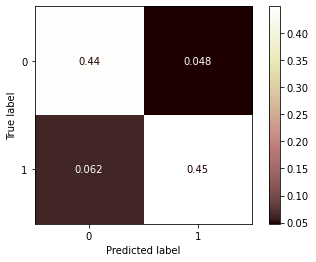

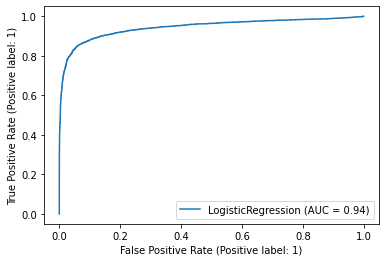

In [ ]:
# Logistic Regression penalized with Elastic Net (L1 penalty = 50%, L2 penalty = 50%)

params_lr = {'penalty': 'elasticnet', 'l1_ratio':0.5, 'solver': 'saga'}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

#### Naive Bayes Classifier

Accuracy = 0.8862130122281341
ROC Area under Curve = 0.8869918318733662
Time taken = 0.03889656066894531
              precision    recall  f1-score   support

           0    0.85633   0.92190   0.88791      5237
           1    0.91941   0.85208   0.88447      5476

    accuracy                        0.88621     10713
   macro avg    0.88787   0.88699   0.88619     10713
weighted avg    0.88857   0.88621   0.88615     10713



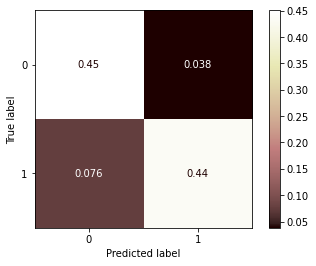

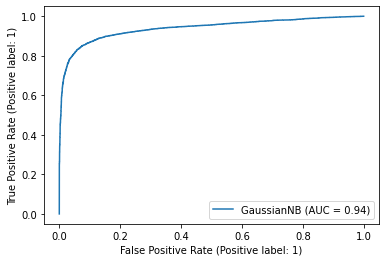

In [ ]:
params_nb = {}

model_nb = GaussianNB(**params_nb)
model_nb, accuracy_nb, roc_auc_nb, tt_nb = run_model(model_nb, X_train, y_train, X_test, y_test)

#### K-Nearest Neighbor Classifier

Accuracy = 0.9297115653878465
ROC Area under Curve = 0.9305953850314661
Time taken = 11.463815212249756
              precision    recall  f1-score   support

           0    0.89486   0.97021   0.93101      5237
           1    0.96902   0.89098   0.92836      5476

    accuracy                        0.92971     10713
   macro avg    0.93194   0.93060   0.92969     10713
weighted avg    0.93276   0.92971   0.92966     10713



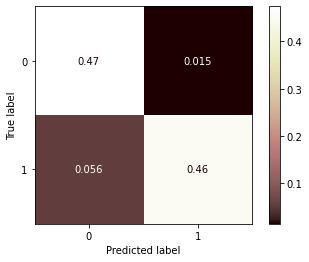

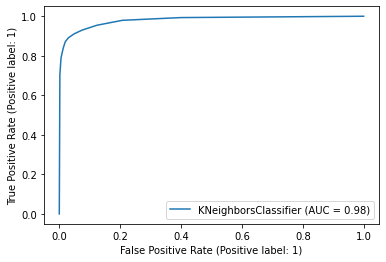

In [ ]:
params_kn = {'n_neighbors':10, 'algorithm': 'kd_tree', 'n_jobs':4}

model_kn = KNeighborsClassifier(**params_kn)
model_kn, accuracy_kn, roc_auc_kn, tt_kn = run_model(model_kn, X_train, y_train, X_test, y_test)

#### Decision Tree Classifier

Accuracy = 0.9315784560813964
ROC Area under Curve = 0.931704814160857
Time taken = 0.05715751647949219
              precision    recall  f1-score   support

           0    0.92379   0.93737   0.93053      5237
           1    0.93925   0.92604   0.93260      5476

    accuracy                        0.93158     10713
   macro avg    0.93152   0.93170   0.93156     10713
weighted avg    0.93169   0.93158   0.93159     10713



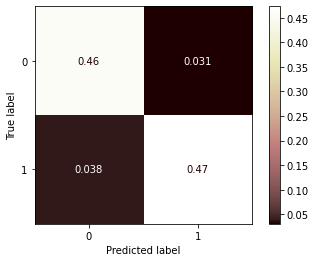

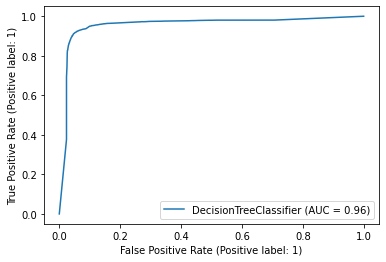

In [ ]:
params_dt = {'max_depth': 12,
             'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt, tt_dt = run_model(model_dt, X_train, y_train, X_test, y_test)

#### Neural Network

Accuracy = 0.9537011107999627
ROC Area under Curve = 0.9539530770339105
Time taken = 12.320119142532349
              precision    recall  f1-score   support

           0    0.94152   0.96525   0.95323      5237
           1    0.96594   0.94266   0.95416      5476

    accuracy                        0.95370     10713
   macro avg    0.95373   0.95395   0.95370     10713
weighted avg    0.95400   0.95370   0.95371     10713



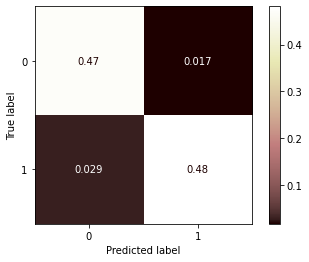

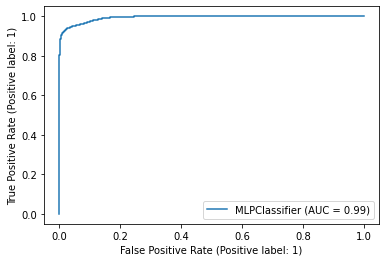

In [ ]:
# Neural Network (Multilayer Perceptron)
params_nn = {'hidden_layer_sizes': (30,30,30),
             'activation': 'logistic',
             'solver': 'lbfgs',
             'max_iter': 100}

model_nn = MLPClassifier(**params_nn)
model_nn, accuracy_nn, roc_auc_nn, tt_nn = run_model(model_nn, X_train, y_train, X_test, y_test)

#### Random Forest

Accuracy = 0.9646224213572295
ROC Area under Curve = 0.9649360802002607
Time taken = 3.8487460613250732
              precision    recall  f1-score   support

           0    0.95015   0.97900   0.96436      5237
           1    0.97931   0.95088   0.96488      5476

    accuracy                        0.96462     10713
   macro avg    0.96473   0.96494   0.96462     10713
weighted avg    0.96506   0.96462   0.96463     10713



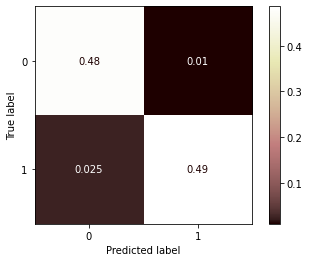

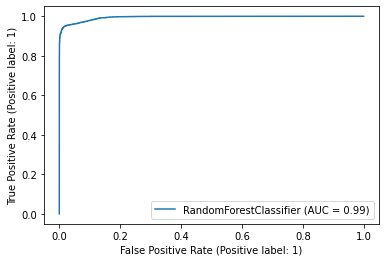

In [ ]:
params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 12345}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, tt_rf = run_model(model_rf, X_train, y_train, X_test, y_test)

It can be seen that Random Forest has performed very well on both Accuracy and area under ROC curve. Now, we have to find how many decision trees are minimally required make the Accuarcy consistent (since Random forest is a collection of Decision Trees).

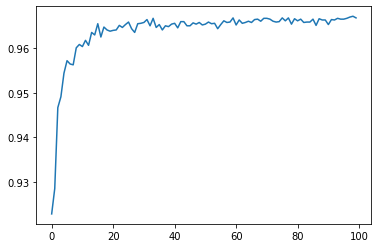

In [ ]:
import numpy as np
%matplotlib inline

trees=range(100)
accuracy=np.zeros(100)

for i in range(len(trees)):
    clf = RandomForestClassifier(n_estimators = i+1)
    model1 = clf.fit(X_train, y_train.ravel())
    y_predictions = model1.predict(X_test)
    accuracy[i] = accuracy_score(y_test, y_predictions)

plt.plot(trees,accuracy)

From above graph, we can conclude that minimum 40 trees are required to make accuracy fairly consistent
(though minimal fluctuation is still present, we can try the graph after increasing the number of iterations).

#### Extreme Gradient Boosting

Accuracy = 0.9651824885652945
ROC Area under Curve = 0.9653797507285423
Time taken = 53.945597887039185
              precision    recall  f1-score   support

           0    0.95543   0.97422   0.96473      5237
           1    0.97487   0.95654   0.96562      5476

    accuracy                        0.96518     10713
   macro avg    0.96515   0.96538   0.96518     10713
weighted avg    0.96537   0.96518   0.96519     10713



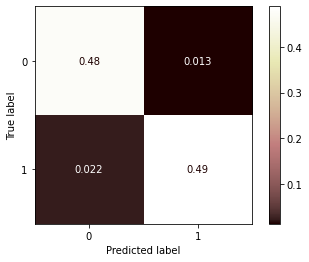

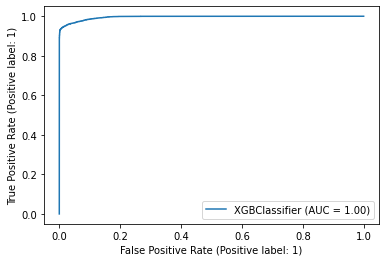

In [ ]:
params_xgb ={'n_estimators': 500,
            'max_depth': 16}

model_xgb = xgb.XGBClassifier(**params_xgb)
model_xgb, accuracy_xgb, roc_auc_xgb, tt_xgb = run_model(model_xgb, X_train, y_train, X_test, y_test)

#### Adaptive Gradient Boosting

Accuracy = 0.9354989265378512
ROC Area under Curve = 0.9355188952351037
Time taken = 18.194488525390625
              precision    recall  f1-score   support

           0    0.93197   0.93641   0.93418      5237
           1    0.93891   0.93462   0.93676      5476

    accuracy                        0.93550     10713
   macro avg    0.93544   0.93552   0.93547     10713
weighted avg    0.93552   0.93550   0.93550     10713



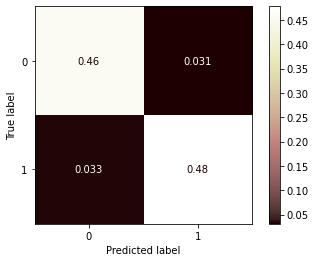

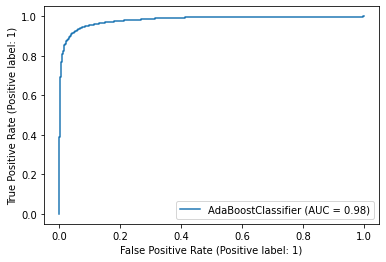

In [ ]:
params_adab ={'n_estimators': 500,
              'random_state': 12345}

model_adab = AdaBoostClassifier(**params_adab)
model_adab, accuracy_adab, roc_auc_adab, tt_adab = run_model(model_adab, X_train, y_train, X_test, y_test)

### Model Comparison

Compare the performances of the above discussed models with respect to their ROC_AUC score and total time taken for execution.

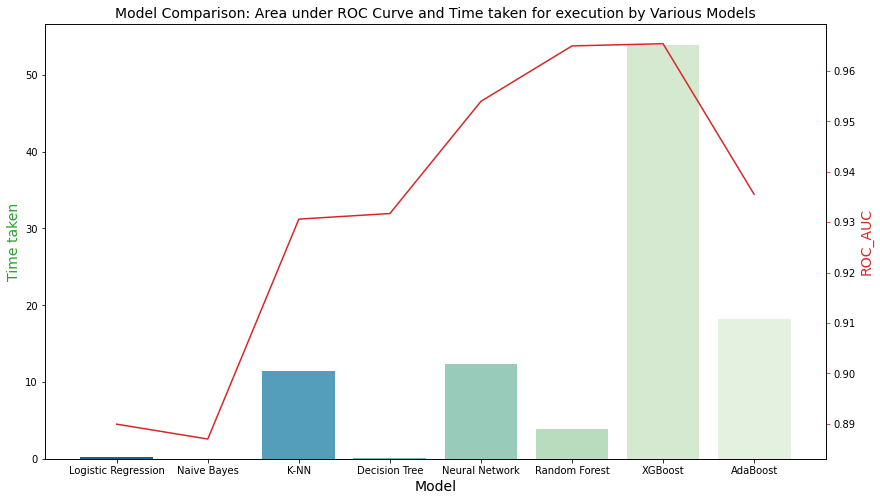

In [ ]:
roc_auc_scores = [roc_auc_lr, roc_auc_nb, roc_auc_kn, roc_auc_dt, roc_auc_nn, roc_auc_rf, roc_auc_xgb, roc_auc_adab]
tt = [tt_lr, tt_nb, tt_kn, tt_dt, tt_nn, tt_rf, tt_xgb, tt_adab]

model_data = {'Model': ['Logistic Regression','Naive Bayes','K-NN','Decision Tree','Neural Network','Random Forest','XGBoost','AdaBoost'],
              'ROC_AUC': roc_auc_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(14,8))
ax1.set_title('Model Comparison: Area under ROC Curve and Time taken for execution by Various Models', fontsize=14)
color = 'tab:green'
ax1.set_xlabel('Model', fontsize=14)
ax1.set_ylabel('Time taken', fontsize=14, color=color)
ax2 = sns.barplot(x='Model', y='Time taken', data = data, palette='GnBu_r')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('ROC_AUC', fontsize=14, color=color)
ax2 = sns.lineplot(x='Model', y='ROC_AUC', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)